# Noble Prize EDA
An Investigative Analysis on Who Won Noble Prizes (to be continued...)

![Noble Prize](img/Nobel_Prize.png)

**Noble Prize**!

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize. <br> <br>

The Nobel Foundation has made a dataset `noble.csv` available of all prize winners from the outset of the awards from 1901 to 2023.

The dataset with the following table detailing the column names and descriptions:

## The data
### **noble.csv**
| Column | Description |
|--------|-------------|
| `year` | The year the prize was given |
| `category` | Type of the prize |
| `prize` | Title of the prize |
| `motivation` | Motivation behind the prize |
| `prize_share` | Prize share |
| `laureate_id` | Individual laureate id |
| `laureate_type` | Laureate type |
| `full_name` | Full name of the winner |
| `birth_date` | Birth date in yyyy-mm-dd |
| `birth_city` | Birth City |
| `sex` | Gender Male or Female |
| `organization_name` | Working Organization at the time |
| `organization_city` | Organization city |
| `organization_country` | Organization country |
| `death_city` | City at the time of death |
| `death_country` | Country of death |


## Contents

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msn
import matplotlib.ticker as mtick

## Reading dataset

In [2]:
df = pd.read_csv(r"data\nobel.csv")

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [4]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [5]:
# df.describe()
df.shape

(1000, 18)

## Missing value

### Checking for missing value & Data Filtering

In [6]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

Let's visualize missing values:

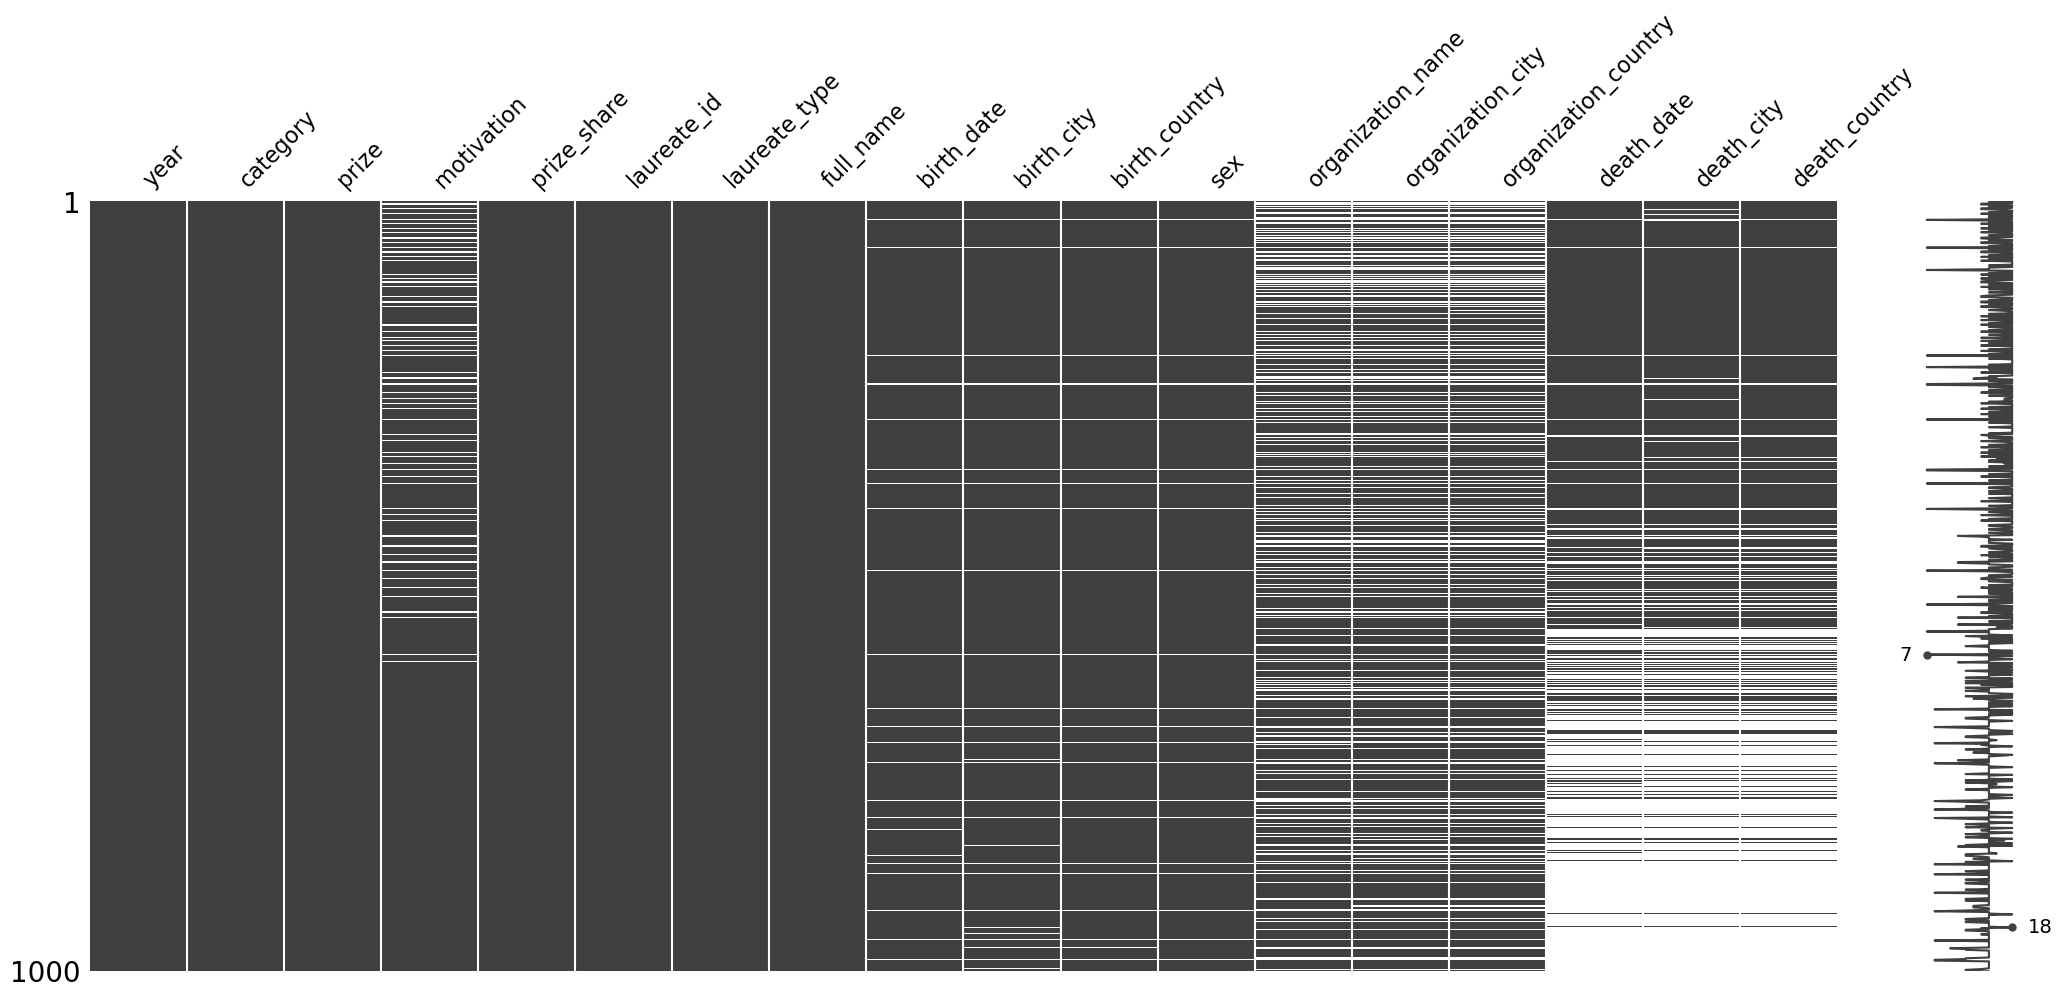

In [7]:
msn.matrix(df);

### Dropping missing values || 5% rule

In [8]:
print(str(df.isna().sum()['birth_country'] / df.shape[0] * 100) + '%')

3.1%


As we would be exploring the prize winning trend based on birth country, sex, category etc.: let's drop the rows with missing birth countries as its less than 5%. (3.1%)

In [9]:
df.dropna(subset=['birth_country'], inplace=True)

In [10]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               72
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date                2
birth_city                5
birth_country             0
sex                       0
organization_name       233
organization_city       234
organization_country    234
death_date              373
death_city              390
death_country           384
dtype: int64

### Data Filtering

There are 18 columns and for the ease of memory: we can take the columns of interest and filter out the rest of them.

In [11]:
df_filtered = df.loc[:,['year', 'category', 'full_name', 'birth_date', 'birth_country', 'sex']]
df_filtered.head()

,year,category,full_name,birth_date,birth_country,sex
0,1901,Chemistry,Jacobus Henricus van 't Hoff,1852-08-30,Netherlands,Male
1,1901,Literature,Sully Prudhomme,1839-03-16,France,Male
2,1901,Medicine,Emil Adolf von Behring,1854-03-15,Prussia (Poland),Male
3,1901,Peace,Jean Henry Dunant,1828-05-08,Switzerland,Male
4,1901,Peace,Frédéric Passy,1822-05-20,France,Male


## Understanding Data

In [12]:
df_filtered.describe()

,year
count,969.000000
mean,1973.495356
std,34.507189
min,1901.000000
25%,1949.000000
50%,1979.000000
75%,2002.000000
max,2023.000000


In [13]:
for col in df_filtered.columns:
    print(df[col].describe(), end='\n\n')

count     969.000000
mean     1973.495356
std        34.507189
min      1901.000000
25%      1949.000000
50%      1979.000000
75%      2002.000000
max      2023.000000
Name: year, dtype: float64

count          969
unique           6
top       Medicine
freq           227
Name: category, dtype: object

count              969
unique             965
top       John Bardeen
freq                 2
Name: full_name, dtype: object

count            967
unique           948
top       1932-10-24
freq               2
Name: birth_date, dtype: object

count                          969
unique                         129
top       United States of America
freq                           291
Name: birth_country, dtype: object

count      969
unique       2
top       Male
freq       904
Name: sex, dtype: object



Observation:
- year of noble prize award ranging from 1901 to 2023: a data range of 122 years!
- 50% data are from 1979 and before
- awarded in 6 unique categories, Medicine is the most awarded with more than 200 times
- 965 different Noble Laureate won the prestigious prize (considering name for the same individual was not recored in different name string anywhere)
- USA is the country with most Noble Prize Winners among 129 countries who have the pride of having at least one Noble Prize Winner!
- Expectedly, more than 90% male laureates won the prize
<br>

Let's dive into more depth!

## For Country!

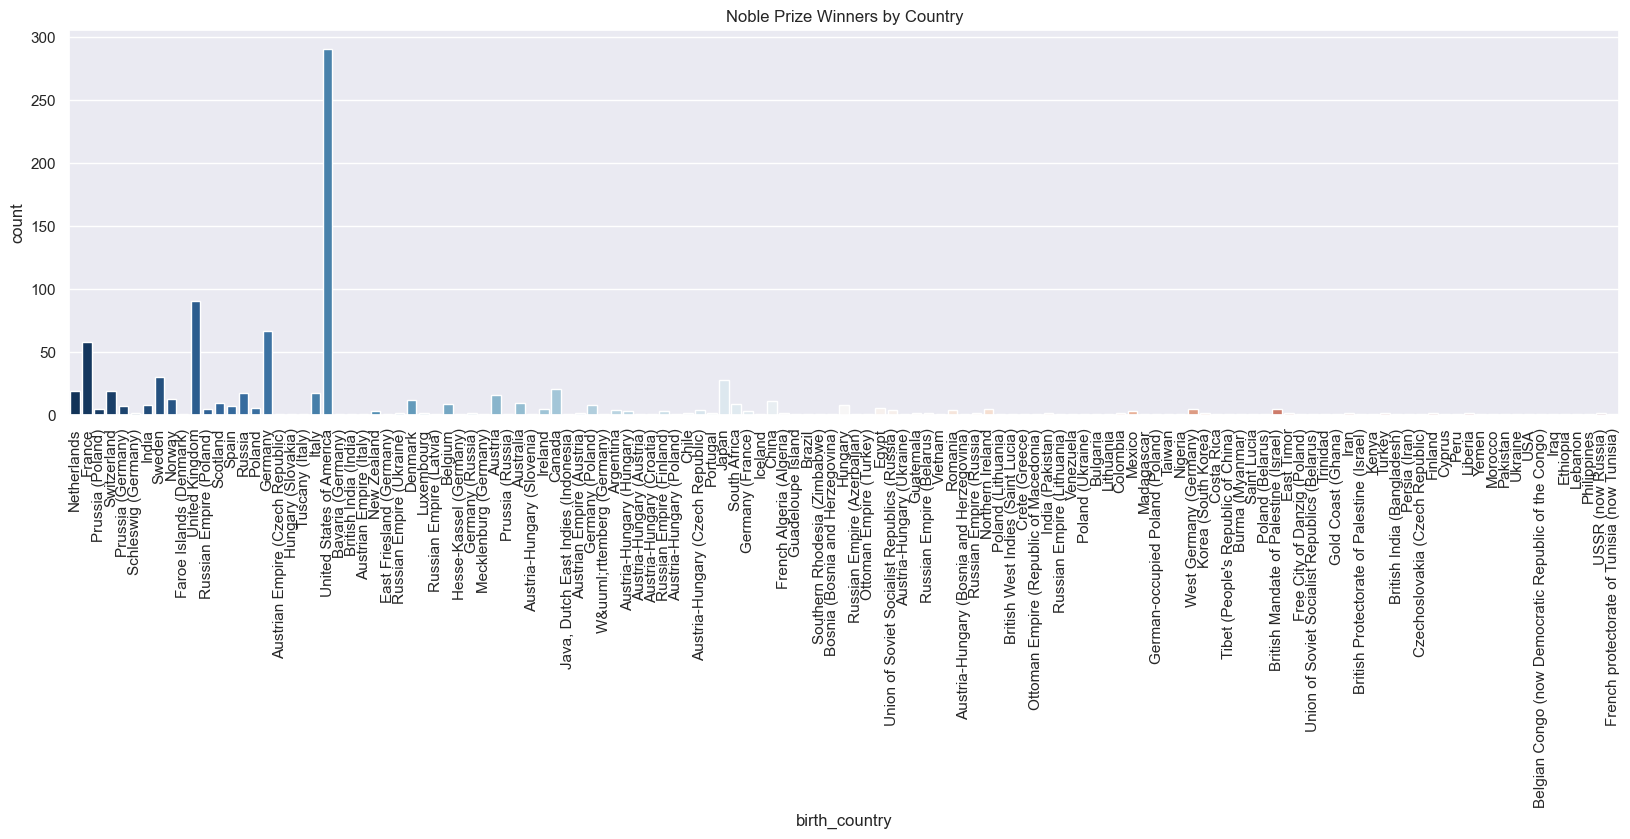

In [41]:
fig, ax = plt.subplots()
g = sns.countplot(x="birth_country", data=df_filtered, palette='RdBu_r')
plt.xticks(rotation=90)
fig.set_size_inches([20, 5])
ax.set_title('Noble Prize Winners by Country')
plt.show()

Not looking so aesthetic, is it? Let's focus on top countries producing the most noble prize winners.

In [15]:
df_filtered['birth_country'].value_counts().describe()

count    129.000000
mean       7.511628
std       27.789981
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      291.000000
Name: count, dtype: float64

129 countries to have noble prize winner in their history books and it seems 75% of the countries have less or equal 4 noble prizes. Which countries are at the top 25%?

In [16]:
count = df_filtered['birth_country'].value_counts()
top25_country = df_filtered[df_filtered['birth_country'].isin(count[count > 4].index)]
top25_country.head()

,year,category,full_name,birth_date,birth_country,sex
0,1901,Chemistry,Jacobus Henricus van 't Hoff,1852-08-30,Netherlands,Male
1,1901,Literature,Sully Prudhomme,1839-03-16,France,Male
2,1901,Medicine,Emil Adolf von Behring,1854-03-15,Prussia (Poland),Male
3,1901,Peace,Jean Henry Dunant,1828-05-08,Switzerland,Male
4,1901,Peace,Frédéric Passy,1822-05-20,France,Male


In [17]:
top25_country['birth_country'].value_counts().head(5)

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: count, dtype: int64

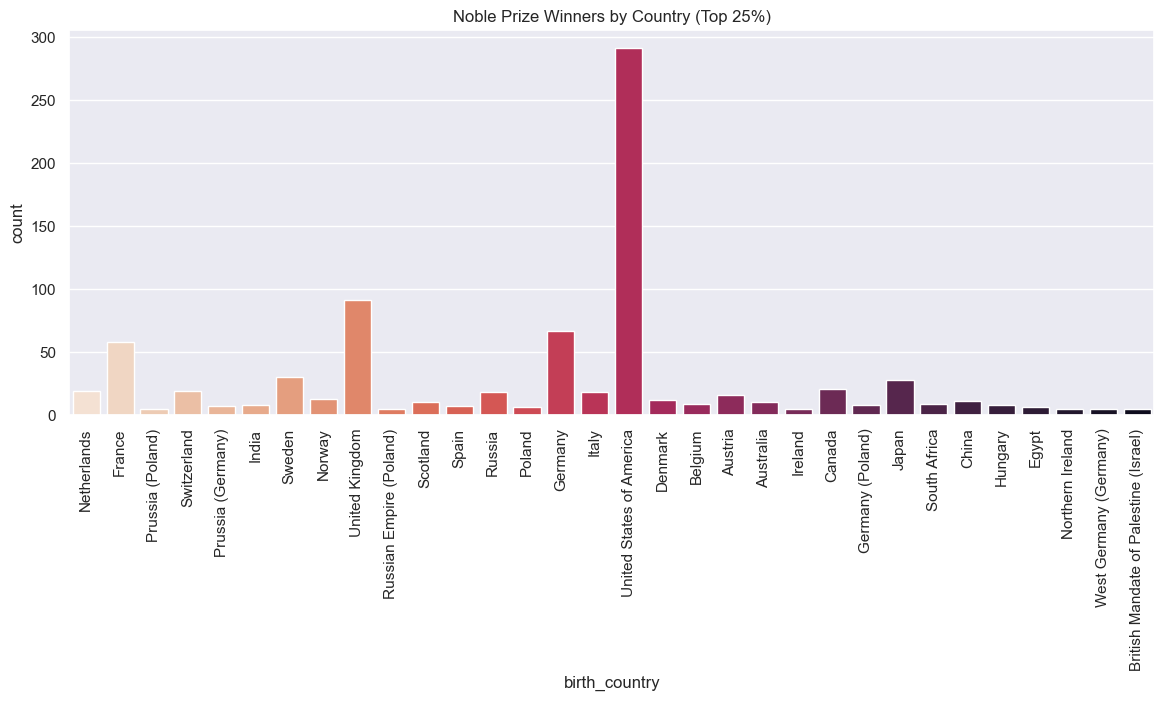

In [36]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots()
g = sns.countplot(x="birth_country", data=top25_country, palette='rocket_r')
plt.xticks(rotation=90)
fig.set_size_inches([14, 5])
ax.set_title('Noble Prize Winners by Country (Top 25%)')
plt.show()

In [19]:
top3 = top25_country[top25_country['birth_country'].isin(['United States of America', 'United Kingdom', 'Germany'])]

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


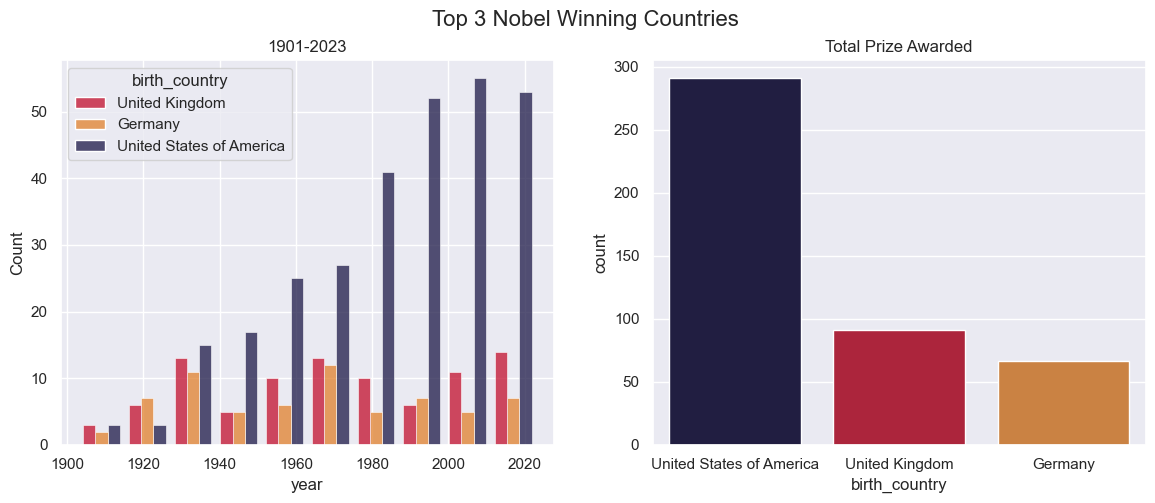

In [38]:
fig, ax = plt.subplots(1,2)
custom_palette = {'United States of America': '#1c1847', 'United Kingdom': '#c20f2d', 'Germany': '#e1812c'}
g = sns.histplot(x='year', data=top3, hue='birth_country', multiple='dodge', palette=custom_palette, shrink=.8, ax=ax[0])
g = sns.barplot(x=top3['birth_country'].value_counts().index, y=top3['birth_country'].value_counts(), palette=custom_palette, ax=ax[1])

ax[0].set_title('1901-2023')
ax[1].set_title('Total Prize Awarded')

fig.suptitle('Top 3 Nobel Winning Countries', fontsize=16)
fig.set_size_inches([14, 5])

plt.show()

From 1901 to 2023, 

| Country      | Noble Won |
|:---------:|:---:|
| USA  | 291  |
| UK     | 91  |
| GER   | 67  |
| FRA   | 58  |
| SWE   | 30  |

The presence of USA is unreal! They were awarded 3 times more than the second best UK! Let's put a magnify glass on the glory of USA.

### Dominance of USA

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahnaf\AppData\Local\Temp\ipykernel_20100\1988012340.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels([f'{percentage}%' for percentage in percentages])


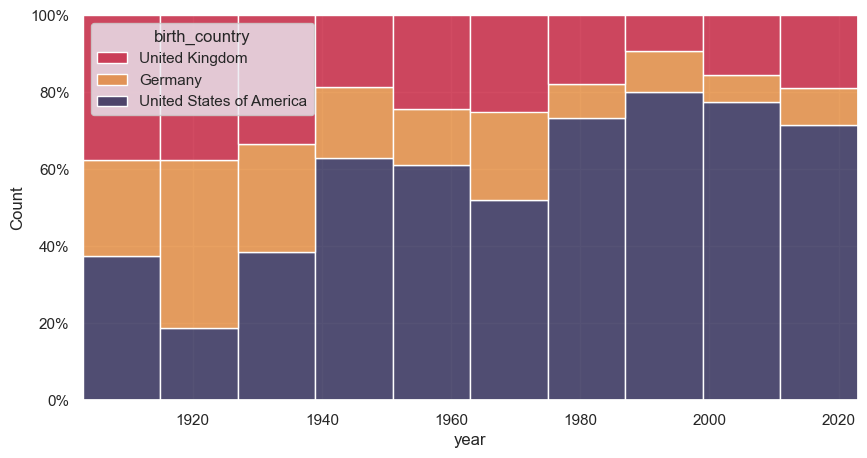

In [21]:
fig, ax = plt.subplots()
custom_palette = {'United States of America': '#1c1847', 'United Kingdom': '#c20f2d', 'Germany': '#e1812c'}
g = sns.histplot(x='year', data=top3, hue='birth_country', multiple='fill', palette=custom_palette)

y_values = g.get_yticks()
percentages = [int(value * 100) for value in y_values]
g.set_yticklabels([f'{percentage}%' for percentage in percentages])

fig.set_size_inches([10, 5])
plt.show()

In [22]:
df_filtered.isna().sum()

year             0
category         0
full_name        0
birth_date       2
birth_country    0
sex              0
dtype: int64